> SIMPLE LINEAR REGRESSION

Simple Linear Regression memodelkan hubungan antar sebuah response variable dengan sebuah explanatory variabel sebagai suatu garis lurus (linear)

In [6]:
import pandas as pd

data_rumah = {
    'luas rumah' : [100, 150, 230, 240, 300, 335, 500],
    'harga rumah': [250000, 350000, 450000, 550000, 650000, 750000, 1000000]
}

data_rumah_df = pd.DataFrame(data_rumah)
data_rumah_df

,luas rumah,harga rumah
0,100,250000
1,150,350000
2,230,450000
3,240,550000
4,300,650000
5,335,750000
6,500,1000000


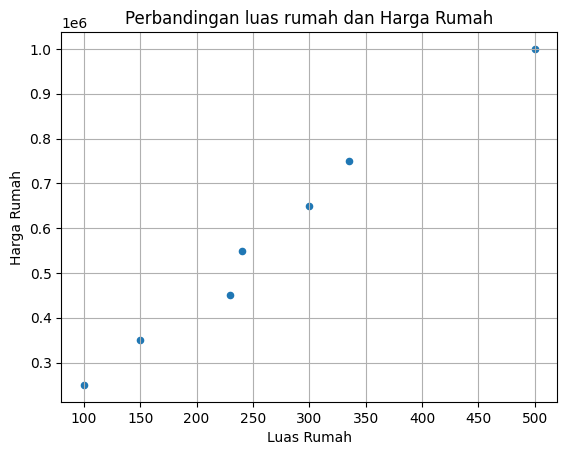

In [11]:
# Visualisasi Data

import matplotlib.pyplot as plt

data_rumah_df.plot(kind='scatter', x='luas rumah', y='harga rumah')

plt.title('Perbandingan luas rumah dan Harga Rumah')
plt.xlabel('Luas Rumah')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

In [13]:
# Penyesuaian Dataset

import numpy as np

x = np.array(data_rumah_df['luas rumah'])
y = np.array(data_rumah_df['harga rumah'])

print(f'x : {x}')
print(f'y : {y}')

x : [100 150 230 240 300 335 500]
y : [ 250000  350000  450000  550000  650000  750000 1000000]


In [15]:
x = x.reshape(-1, 1)
x.shape

(7, 1)

In [16]:
x

array([[100],
       [150],
       [230],
       [240],
       [300],
       [335],
       [500]], dtype=int64)

In [18]:
# Training Simple Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [20]:
# Visualisasi Linear Regression Model

x_visual = np.array([0,600]).reshape(-1, 1)
y_visual = model.predict(x_visual)

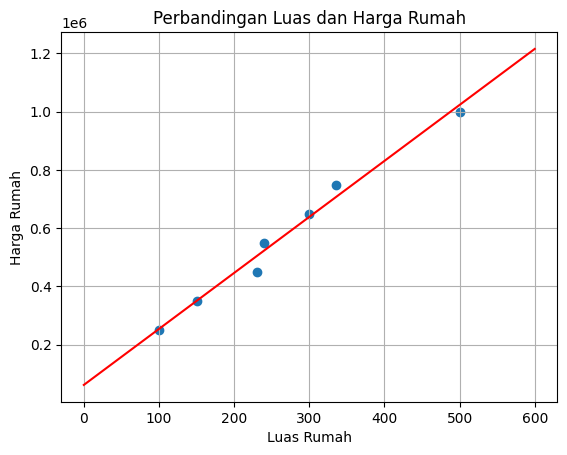

In [22]:
plt.scatter(x,y)
plt.plot(x_visual, y_visual, '-r')

plt.title('Perbandingan Luas dan Harga Rumah')
plt.xlabel('Luas Rumah')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

> FORMULA LINEAR REGRESSION 

y = alpha + beta x

y     : response variable <br>
x     : explanatory variable <br>
alpha : intercept <br>
beta  : slope <br>

In [24]:
print(f'intercept : {model.intercept_}')
print(f'slope     : {model.coef_}')

intercept : 62009.85459306731
slope     : [1922.33478051]


In [26]:
# Mencari nilai slope

# beta = cov(x,y) / var(x)

print(f'x         : \n {x}')
print(f'x Flatten : {x.flatten()}\n')
print(f'y         : {y}')

x         : 
 [[100]
 [150]
 [230]
 [240]
 [300]
 [335]
 [500]]
x Flatten : [100 150 230 240 300 335 500]

y         : [ 250000  350000  450000  550000  650000  750000 1000000]


In [28]:
# Variance 

variance_x = np.var(x.flatten(), ddof=1)
print(f'variance : {variance_x}')

variance : 17275.0


In [30]:
# Covariance

np.cov(x.flatten(), y)

array([[1.72750000e+04, 3.32083333e+07],
       [3.32083333e+07, 6.48809524e+10]])

In [32]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'covariance : {covariance_xy}')

covariance : 33208333.333333332


In [34]:
# Slope 

slope = covariance_xy / variance_x

print(f'Slope : {slope}')

Slope : 1922.3347805113362


In [36]:
# Mencari nilai intercept

# alpha = y(bar) - beta x(bar)

intercept = np.mean(y) - slope * np.mean(x)

print(f'intercept : {intercept}')

intercept : 62009.85459306737


In [38]:
# Prediksi Harga Rumah

luas_rumah = np.array([180, 220, 260]).reshape(-1, 1)
luas_rumah
# harga_rumah = np.array([400000, 480000, 580000])

array([[180],
       [220],
       [260]])

In [40]:
prediksi_harga_rumah = model.predict(luas_rumah)
prediksi_harga_rumah

array([408030.11508511, 484923.50630556, 561816.89752601])

In [43]:
for ls, hrg in zip(luas_rumah, prediksi_harga_rumah):
    print(f'Luas rumah : {ls} , prediksi harga : {hrg}')

Luas rumah : [180] , prediksi harga : 408030.11508510786
Luas rumah : [220] , prediksi harga : 484923.50630556134
Luas rumah : [260] , prediksi harga : 561816.8975260148


In [45]:
# Evaluasi Simple Linear Regression Model
# Training & Testing Dataset

x_train = np.array([100, 150, 230, 240, 300, 335, 500]).reshape(-1, 1)
y_train = np.array([250000, 350000, 450000, 550000, 650000, 750000, 1000000])

x_test = np.array([170, 210, 250, 400, 260, 360, 430]).reshape(-1, 1)
y_test = np.array([450000, 550000, 650000, 1000000, 580000, 730000, 850000])

In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [50]:
# Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared (R2)

from sklearn.metrics import r2_score

y_prediction = model.predict(x_test)
r_squared = r2_score(y_test, y_prediction)

print(f'R-Squared : {r_squared}')

R-Squared : 0.7507864451521028


In [54]:
# Mencari nilai R-Squared (R2)

# R2 = 1 - (SSres) / (SStot)
# SSres = for i = 1 to n (yi - f(xi)2)
# SStot = for i = 1 to n (yi - y(bar))2

ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2 for x_i, y_i in zip(x_test, y_test)])

print(f'ss_res : {ss_res}')

ss_res : 53367302673.85686


In [56]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y) ** 2 for y_i in y_test])

print(f'ss_tot : {ss_tot}')

ss_tot : 214142857142.85718


In [57]:
manual_r2 = 1 - (ss_res / ss_tot)
print(f'R-Squared : {manual_r2}')

R-Squared : 0.7507864451521028
